# DS-SF-34 | Unit Project | 3 | Machine Learning Modeling and Executive Summary | Starter Code

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Projects 1 and 2.  You will summarize and present your findings and the methods you used.

In [254]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [255]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))
df.dropna(inplace = True)

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Part A.  Frequency Table

> ### Question 1.  Create a frequency table for `prestige` and whether an applicant was admitted.

In [268]:
pd.crosstab(df.prestige, df.admit, dropna = False)

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


## Part B.  Feature Engineering

> ### Question 2.  Create a one-hot encoding for `prestige`.

In [269]:
prestige_df = pd.get_dummies(df.prestige, prefix = 'prestige')
prestige_df

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
395,0,1,0,0
396,0,0,1,0
397,0,1,0,0
398,0,1,0,0


> ### Question 3.  How many of these binary variables do we need for modeling?

We only need one binary variable for modeling.  Using logistical regression we can use one these variables to get a predictive model, however, it probably will not be as accurate compared to using two or three variables to build the model.  

> ### Question 4.  Why are we doing this?

We are doing this to get a better breakdown of the prestige variable.  By changing the descriptive variable (prestige) into multiple binary variables we can use the signal from the prestige varible into our classification model.  

> ### Question 5.  Add all these binary variables in the dataset and remove the now redundant `prestige` feature.

In [270]:
prestige_df.rename(columns = {'prestige_1.0': 'prestige_1',
    'prestige_2.0': 'prestige_2',
    'prestige_3.0': 'prestige_3',
    'prestige_4.0': 'prestige_4'}, inplace = True)

In [271]:
prestige_df

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
395,0,1,0,0
396,0,0,1,0
397,0,1,0,0
398,0,1,0,0


In [272]:
df = df.join([prestige_df])

ValueError: Indexes have overlapping values: ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

In [274]:
df

,admit,gre,gpa,prestige,prestige_1,prestige_2,prestige_3,prestige_4
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1
...,...,...,...,...,...,...,...,...
395,0,620.0,4.00,2.0,0,1,0,0
396,0,560.0,3.04,3.0,0,0,1,0
397,0,460.0,2.63,2.0,0,1,0,0
398,0,700.0,3.65,2.0,0,1,0,0


## Part C.  Hand calculating odds ratios

Let's develop our intuition about expected outcomes by hand calculating odds ratios.

> ### Question 6.  Create a frequency table for `prestige = 1` and whether an applicant was admitted.

In [278]:
pd.crosstab(df.prestige_1, df.admit, dropna = False)

admit,0,1
prestige_1,,
0,243,93
1,28,33


> ### Question 7.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the most prestigious undergraduate schools.

In [279]:
prob_p1admit = 33 / 61
odds_p1admit = prob_p1admit / (1 - prob_p1admit)

print (prob_p1admit)
print (odds_p1admit)

0.5409836065573771
1.1785714285714288


> ### Question 8.  Now calculate the odds of admission for undergraduates who did not attend a #1 ranked college.

In [280]:
prob_np1admit = 93 / 336
odds_np1admit = prob_np1admit / (1 - prob_np1admit)

print (prob_np1admit)
print (odds_np1admit)

0.2767857142857143
0.3827160493827161


> ### Question 9.  Finally, what's the odds ratio?

In [281]:
odds_p1admit / odds_np1admit

3.079493087557604

> ### Question 10.  Write this finding in a sentence.

If you attended a number 1 ranked college you are three times more likely to get accepted to UCLA grad school than someone who did not attend a top ranked college.

> ### Question 11.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the least prestigious undergraduate schools.  Then calculate their odds ratio of being admitted to UCLA.  Finally, write this finding in a sentence.

In [283]:
pd.crosstab(df.prestige_4, df.admit, dropna = False)

admit,0,1
prestige_4,,
0,216,114
1,55,12


In [284]:
prob_p4admit = 12 / 67
odds_p4admit = prob_p4admit / (1 - prob_p4admit)

print (prob_p4admit)
print (odds_p4admit)

0.1791044776119403
0.21818181818181817


In [285]:
prob_np4admit = 114 / 330
odds_np4admit = prob_np4admit / (1 - prob_np4admit)

print (prob_np4admit)
print (odds_np4admit)

0.34545454545454546
0.5277777777777778


In [286]:
odds_p4admit / odds_np4admit

0.4133971291866028

In [287]:
odds_no = 1 / (odds_p4admit / odds_np4admit)

print (odds_no)

2.418981481481482


If you attended one of the least pretigious undergrad schools you are 2.4 times less likely to gain acceptance in UCLA business school than someone who did not attend the least pretigious university

## Part D. Analysis using `statsmodels`

> ### Question 12.  Fit a logistic regression model predicting admission into UCLA using `gre`, `gpa`, and the `prestige` of the undergraduate schools.  Use the highest prestige undergraduate schools as your reference point.

In [300]:
X = df[ ['gre', 'gpa', 'prestige_2',] ]

In [301]:
X

,gre,gpa,prestige_2
0,380.0,3.61,0
1,660.0,3.67,0
2,800.0,4.00,0
3,640.0,3.19,0
4,520.0,2.93,0
...,...,...,...
395,620.0,4.00,1
396,560.0,3.04,0
397,460.0,2.63,1
398,700.0,3.65,1


In [302]:
c = df.admit

In [303]:
c

0      0
1      1
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: admit, dtype: int64

In [304]:
model_cs = linear_model.LogisticRegression().\
    fit(X, df.admit)

print (model_cs.coef_)
print (model_cs.intercept_)

[[ 0.00198112  0.11377608  0.22286419]]
[-2.38527501]


> ### Question 13.  Print the model's summary results.

In [295]:
model_cs.score(X, df.admit)

0.7002518891687658

> ### Question 14.  What are the odds ratios of the different features and their 95% confidence intervals?

In [296]:
logit_hat_cs = model_cs.intercept_ + \
    (X * model_cs.coef_[0]).sum(axis = 1)

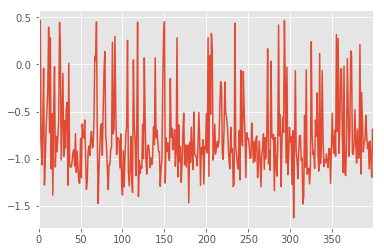

In [297]:
logit_hat_cs.plot()

In [298]:
odds_hat_cs = np.exp(logit_hat_cs)

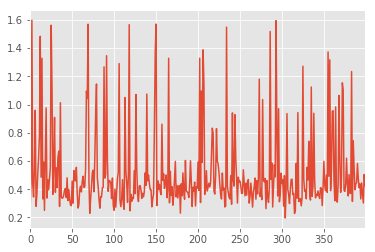

In [299]:
odds_hat_cs.plot()

> ### Question 15.  Interpret the odds ratio for `prestige = 2`.

In [306]:
 pd.crosstab(df.prestige_2, df.admit, dropna = False)

admit,0,1
prestige_2,,
0,176,73
1,95,53


In [307]:
prob_p2admit = 53 / 148
odds_p2admit = prob_p2admit / (1 - prob_p2admit)

print (prob_p4admit)
print (odds_p4admit)

0.1791044776119403
0.21818181818181817


In [308]:
prob_np2admit = 73 / 249
odds_np2admit = prob_np2admit / (1 - prob_np2admit)

print (prob_np2admit)
print (odds_np2admit)

0.2931726907630522
0.41477272727272724


In [309]:
odds_p2admit / odds_np2admit

1.34506128334535

If you are from a prestige level 2 school odds of you gaining acceptance compared to someone not from a prestige 2 school is 1.34 to 1

> ### Question 16.  Interpret the odds ratio of `gpa`.

I do not know this one.

> ### Question 17.  Assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

I do not have this one

Answer: TODO

## Part E. Moving the model from `statsmodels` to `sklearn`

> ### Question 18.  Let's assume we are satisfied with our model.  Remodel it (same features) using `sklearn`.  When creating the logistic regression model with `LogisticRegression(C = 10 ** 2)`.

In [311]:
X = df[ ['gre', 'gpa', 'prestige_1', 'prestige_2', 'prestige_3', 'prestige_4'] ]
c = df.admit

model = linear_model.LogisticRegression().\
    fit(X, c)

In [312]:
model.score(X, c)

0.7128463476070529

In [313]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Predicted Acceptance'],
    colnames = ['Actual Acceptance'])

Actual Acceptance,0,1
Predicted Acceptance,,
0,256,99
1,15,27


> ### Question 19.  What are the odds ratios for the different variables and how do they compare with the odds ratios calculated with `statsmodels`?

I am not sure

Answer: TODO

> ### Question 20.  Again, assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

I am not sure

Answer: TODO

## Part F.  Executive Summary

> ## Question 21.  Introduction
>
> Write a problem statement for this project.

> ## Question 22.  Dataset
>
> Write up a description of your data and any cleaning that was completed.

Answer: TODO

> ## Question 23.  Demo
>
> Provide a table that explains the data by admission status.

Answer: TODO

> ## Question 24.  Methods
>
> Write up the methods used in your analysis.

Answer: TODO

> ## Question 25.  Results
>
> Write up your results.

Answer: TODO

> ## Question 26.  Visuals
>
> Provide a table or visualization of these results.

Answer: TODO

> ## Question 27.  Discussion
>
> Write up your discussion and future steps.

Answer: TODO